<a href="https://colab.research.google.com/github/aparna993/Capstone-Project/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

!wget http://cb.lk/covid_19
!unzip covid_19
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


--2020-11-19 01:14:51--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-11-19 01:14:52--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-11-19 01:14:53--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-11-19 01:14:53--  https://www.dropbox.com/s/raw/7

# **COVID 19 Detector**

In [13]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

# **Model**

In [11]:
# Model building using keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

# **Training and Test Data Generation**

In [15]:
# Data processing for model training

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [16]:
#Training Data 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),#specified target size
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
#Test Data
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [19]:
#Training the model
history = model.fit_generator(
    train_generator,
    # steps_per_epoch=8
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 0.8354 - accuracy: 0.5938 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.5898 - accuracy: 0.6786 - val_loss: 0.5471 - val_accuracy: 0.9000
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.3960 - accuracy: 0.8125 - val_loss: 0.2206 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.2043 - accuracy: 0.9152 - val_loss: 0.2144 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.3405 - accuracy: 0.8705 - val_loss: 0.1607 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.2196 - accuracy: 0.9196 - val_loss: 0.1025 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.1834 - accuracy: 0.9420 - val_l

# **Results**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


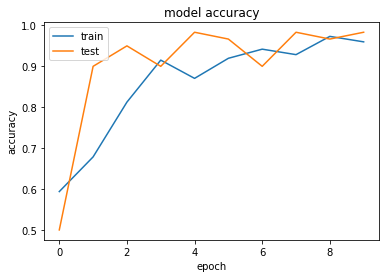

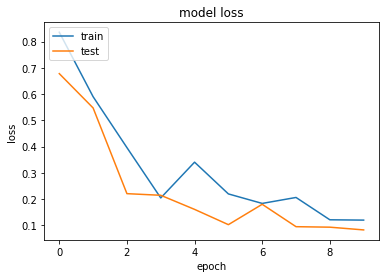

In [20]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()